### Description

### load 

In [156]:
import os
import random 
import pickle
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

root_path = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
# to import src is necessary to append the root_path to the path
#sys.path.append(root_path)

data_path = os.path.join(root_path,'data')
results_path = os.path.join(root_path,'results')

### Define global variables

In [157]:
WITH_STEMMING = True
REMOVE_STOPWORDS = True
MINIMUM_WORDS_PER_PHRASE = 0
GROUP = -1
SEED = 10
num_topics = 60
random.seed(SEED)

In [195]:
df = pd.read_excel('IBL_topic_distribution_by_utterance_with_phrase_before_and_after_time_utterance_minimum_0_words_with_stemming.xlsx')

In [196]:
#df = df[df['length utterance']>0.02]

In [197]:
df.columns

Index(['utterance_before_Topic_1', 'utterance_before_Topic_2',
       'utterance_before_Topic_3', 'utterance_before_Topic_4',
       'utterance_before_Topic_5', 'utterance_before_Topic_6',
       'utterance_before_Topic_7', 'utterance_before_Topic_8',
       'utterance_before_Topic_9', 'utterance_before_Topic_10',
       ...
       'utterance_after_Topic_60', 'phase', 'phase_1', 'phase_2', 'phase_3',
       'phase_4', 'phase_5', 'utterance', 'length utterance',
       'utterance_time'],
      dtype='object', length=189)

### split dataset

In [198]:
the_keys = list(set(df['phase']))
for key in the_keys:
    n = list(df.phase.values).count(key)
    print("key {}, total {}".format(key,n))

key 1, total 474
key 2, total 209
key 3, total 477
key 4, total 70
key 5, total 653


In [199]:
trainset = {}
testset = {}
for name, group in df.groupby(['phase']):
    trainset[name]=[]
    testset[name]=[]
    n = len(group)
    ra = random.sample(range(n),int(n*0.2))
    print("test set phase {}: {}".format(name,int(n*0.2)))
    count = 0
    group = group.reset_index()
    for i,row in group.iterrows():
        if i in ra:
            count+=1
            testset[name].append(row.values)
        else:
            trainset[name].append(row.values)


test set phase 1: 94
test set phase 2: 41
test set phase 3: 95
test set phase 4: 14
test set phase 5: 130


In [200]:
filter_rows = list(range(1,181))+[188,189]
#filter_labels = [3601]

In [201]:
def get_data_from_dict(a_dict):
    y = []
    X = []
    for key in a_dict:
        rows = a_dict[key]
        for row in rows:
            X.append(row[filter_rows])
            y.append(key)
    return X,y

In [202]:
X_train,y_train = get_data_from_dict(trainset)
X_test,y_test = get_data_from_dict(testset)

In [203]:
print(y_test.count(4))
print(len(X_train[0]))

14
182


### Train decision tree


In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=SEED).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.43


In [222]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

In [223]:
clf2 = clf.tree_?

In [ ]:
clf2 = clf.tree_

In [224]:
clf2 = clf.tree_

In [225]:
dot_data = tree.export_graphviz(clf, class_names=['1', '2','3','4','5'], out_file=None,max_depth=3)
graph = graphviz.Source(dot_data)
graph.render('test-output/tree_phases_5_classes_before_after_filtered.gv', view=True)

'test-output/tree_phases_5_classes_before_after_filtered.gv.pdf'

In [207]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[51  6 18  1 18]
 [18  9  8  1  5]
 [15 10 45  4 21]
 [ 1  1  6  1  5]
 [25 13 31  8 53]]
              precision    recall  f1-score   support

           1       0.46      0.54      0.50        94
           2       0.23      0.22      0.23        41
           3       0.42      0.47      0.44        95
           4       0.07      0.07      0.07        14
           5       0.52      0.41      0.46       130

   micro avg       0.43      0.43      0.43       374
   macro avg       0.34      0.34      0.34       374
weighted avg       0.43      0.43      0.42       374



### Train without stem

In [208]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [209]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.61
Accuracy of K-NN classifier on test set: 0.41


In [210]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[55  9 12  1 17]
 [16  9  5  0 11]
 [27  9 32  2 25]
 [ 2  0  5  1  6]
 [30 14 25  4 57]]
              precision    recall  f1-score   support

           1       0.42      0.59      0.49        94
           2       0.22      0.22      0.22        41
           3       0.41      0.34      0.37        95
           4       0.12      0.07      0.09        14
           5       0.49      0.44      0.46       130

   micro avg       0.41      0.41      0.41       374
   macro avg       0.33      0.33      0.33       374
weighted avg       0.41      0.41      0.41       374



In [211]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.25
Accuracy of GNB classifier on test set: 0.21


In [212]:
pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15 17 16 37  9]
 [ 4 12  9 14  2]
 [ 6  9 28 43  9]
 [ 1  1  2 10  0]
 [12 23 31 50 14]]
              precision    recall  f1-score   support

           1       0.39      0.16      0.23        94
           2       0.19      0.29      0.23        41
           3       0.33      0.29      0.31        95
           4       0.06      0.71      0.12        14
           5       0.41      0.11      0.17       130

   micro avg       0.21      0.21      0.21       374
   macro avg       0.28      0.31      0.21       374
weighted avg       0.35      0.21      0.23       374



C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


In [213]:
svm = SVC(decision_function_shape='ovr',gamma=1,kernel='rbf',random_state=SEED,C= 100.0)#class_weight={1:0.8,2:0.4,3:0.7,5:1})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.47


In [214]:
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[50  7 12  0 25]
 [19  7  1  1 13]
 [21  2 40  0 32]
 [ 0  1  3  4  6]
 [26 10 18  2 74]]
              precision    recall  f1-score   support

           1       0.43      0.53      0.48        94
           2       0.26      0.17      0.21        41
           3       0.54      0.42      0.47        95
           4       0.57      0.29      0.38        14
           5       0.49      0.57      0.53       130

   micro avg       0.47      0.47      0.47       374
   macro avg       0.46      0.40      0.41       374
weighted avg       0.47      0.47      0.46       374



### Effect length utterance

In [215]:
pred = svm.predict(X_train)
error_i = [i for i in range(len(y_train)) if y_train[i] != pred[i]]
good_i = [i for i in range(len(y_train)) if y_train[i] == pred[i]]

In [216]:
error_x = [X_train[i] for i in error_i]
good_x = [X_train[i] for i in good_i]

In [217]:
np.mean([x[180] for x in good_x])

0.10844787813434162

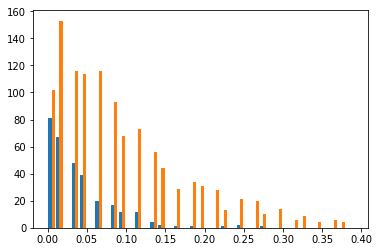

In [218]:
import matplotlib.pyplot as plt
plt.hist([[x[180] for x in error_x],[x[180] for x in good_x]],np.arange(0,0.4,0.01))
plt.show()

In [228]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=SEED,max_iter=3000)#,class_weight={1:0.4,2:0.4,3:0.4,4:0.5,5:0.3})
svc.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.53
Accuracy of SVM classifier on test set: 0.51


In [230]:
pred = svc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[56  2 10  0 26]
 [16  3  4  0 18]
 [21  0 40  0 34]
 [ 1  0  1  0 12]
 [26  3  8  0 93]]
              precision    recall  f1-score   support

           1       0.47      0.60      0.52        94
           2       0.38      0.07      0.12        41
           3       0.63      0.42      0.51        95
           4       0.00      0.00      0.00        14
           5       0.51      0.72      0.59       130

   micro avg       0.51      0.51      0.51       374
   macro avg       0.40      0.36      0.35       374
weighted avg       0.50      0.51      0.48       374



C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\teacher_topic_model\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Optimize params

### Build classifier per class

In [116]:
def get_data_from_dict_filter(a_dict,filter_phase):
    y = []
    X = []
    for key in a_dict:
        rows = a_dict[key]
        for row in rows:
            X.append(row[filter_rows])
            if filter_phase == key:
                y.append(key)
            else:
                y.append(0)
    return X,y

### classify class 1

In [117]:
#trainset,testset = split_sets_key(clean_phrases,1)
X_train,y_train = get_data_from_dict_filter(trainset,1)
X_test,y_test = get_data_from_dict_filter(testset,1)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [118]:
svm = SVC(decision_function_shape='ovr',gamma=1e-05,C= 10000000.0, random_state=SEED)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.79
[[197  12]
 [ 46  21]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       209
           1       0.64      0.31      0.42        67

   micro avg       0.79      0.79      0.79       276
   macro avg       0.72      0.63      0.65       276
weighted avg       0.77      0.79      0.76       276



In [119]:
svm = LinearSVC(random_state=SEED)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.77
[[198  11]
 [ 52  15]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       209
           1       0.58      0.22      0.32        67

   micro avg       0.77      0.77      0.77       276
   macro avg       0.68      0.59      0.59       276
weighted avg       0.74      0.77      0.73       276



### classify class 2

In [120]:
X_train,y_train = get_data_from_dict_filter(trainset,2)
X_test,y_test = get_data_from_dict_filter(testset,2)


C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [121]:
svm = SVC(decision_function_shape='ovr',gamma='scale',C= 10000000.0, random_state=SEED)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.80
[[211  35]
 [ 21   9]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       246
           2       0.20      0.30      0.24        30

   micro avg       0.80      0.80      0.80       276
   macro avg       0.56      0.58      0.56       276
weighted avg       0.83      0.80      0.81       276



### Classify class 3

In [122]:
X_train,y_train = get_data_from_dict_filter(trainset,3)
X_test,y_test = get_data_from_dict_filter(testset,3)

In [123]:
svm = SVC(decision_function_shape='ovr',gamma=1e-05,C= 10000000.0, random_state=SEED)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.79
[[185  18]
 [ 41  32]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       203
           3       0.64      0.44      0.52        73

   micro avg       0.79      0.79      0.79       276
   macro avg       0.73      0.67      0.69       276
weighted avg       0.77      0.79      0.77       276



### Classify class 4

In [124]:
X_train,y_train = get_data_from_dict_filter(trainset,4)
X_test,y_test = get_data_from_dict_filter(testset,4)
svm = SVC(decision_function_shape='ovr',gamma=1e-05,C= 10000000.0, random_state=SEED)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.96
[[264   2]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       266
           4       0.00      0.00      0.00        10

   micro avg       0.96      0.96      0.96       276
   macro avg       0.48      0.50      0.49       276
weighted avg       0.93      0.96      0.94       276



### classify class 5

In [125]:
X_train,y_train = get_data_from_dict_filter(trainset,5)
X_test,y_test = get_data_from_dict_filter(testset,5)
print(y_train.count(0)*100.0/len(y_train))

65.1705565529623


C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


In [146]:
svm = SVC(decision_function_shape='ovr',gamma=1e-05,C= 10000000.0, random_state=SEED,probability=True)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred5 = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred5))

Accuracy of SVM classifier on training set: 0.69
Accuracy of SVM classifier on test set: 0.71
[[168  12]
 [ 74  22]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       180
           5       0.61      0.45      0.51        96

   micro avg       0.71      0.71      0.71       276
   macro avg       0.67      0.65      0.65       276
weighted avg       0.69      0.71      0.69       276



In [155]:
svm = SVC(decision_function_shape='ovr',gamma='scale',C=100,random_state=SEED,probability=True)#,class_weight={0:0.3,1:0.7})
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred5 = svm.predict(X_test)
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))

Accuracy of SVM classifier on training set: 0.71
Accuracy of SVM classifier on test set: 0.71
[[169  11]
 [ 69  27]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       180
           5       0.71      0.28      0.40        96

   micro avg       0.71      0.71      0.71       276
   macro avg       0.71      0.61      0.61       276
weighted avg       0.71      0.71      0.67       276



In [150]:
list(zip(svm.predict_proba(X_test),pred5,y_test))

[(array([0.80782643, 0.19217357]), 0, 0),
 (array([0.75571126, 0.24428874]), 0, 0),
 (array([0.62837001, 0.37162999]), 0, 0),
 (array([0.71087354, 0.28912646]), 0, 0),
 (array([0.72562566, 0.27437434]), 0, 0),
 (array([0.69739819, 0.30260181]), 0, 0),
 (array([0.64664917, 0.35335083]), 0, 0),
 (array([0.68949428, 0.31050572]), 0, 0),
 (array([0.5, 0.5]), 5, 0),
 (array([0.54483354, 0.45516646]), 5, 0),
 (array([0.84984959, 0.15015041]), 0, 0),
 (array([0.73501397, 0.26498603]), 0, 0),
 (array([0.74011365, 0.25988635]), 0, 0),
 (array([0.67047406, 0.32952594]), 0, 0),
 (array([0.74598106, 0.25401894]), 0, 0),
 (array([0.63880666, 0.36119334]), 0, 0),
 (array([0.71058951, 0.28941049]), 0, 0),
 (array([0.72018991, 0.27981009]), 0, 0),
 (array([0.5763504, 0.4236496]), 5, 0),
 (array([0.63692404, 0.36307596]), 0, 0),
 (array([0.70698932, 0.29301068]), 0, 0),
 (array([0.73067155, 0.26932845]), 0, 0),
 (array([0.80389052, 0.19610948]), 0, 0),
 (array([0.75064591, 0.24935409]), 0, 0),
 (array(

#### Regression


In [127]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [128]:
#clf = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42,class_weight={0:0.36,5:0.63}).fit(X_train, y_train)
clf = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42).fit(X_train, y_train)

In [129]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[168  12]
 [ 74  22]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.80       180
           5       0.65      0.23      0.34        96

   micro avg       0.69      0.69      0.69       276
   macro avg       0.67      0.58      0.57       276
weighted avg       0.68      0.69      0.64       276



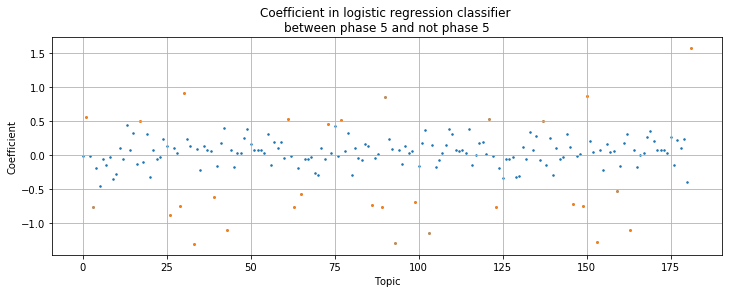

In [130]:
f = plt.figure(figsize=(12,4))
plt.scatter(range(len(clf.coef_[0])),clf.coef_[0],s=2.3)
out_std = [x for x in clf.coef_[0] if np.abs(x) > 0.45]
out_std_i = [i for i,x in enumerate(clf.coef_[0]) if np.abs(x) > 0.45]
plt.scatter(out_std_i,out_std,s=2.8)
#plt.xticks(range(0,len(clf.coef_[0])+1,2),rotation=90)
#plt.ylim(-1,1)
plt.xlabel('Topic')
plt.ylabel('Coefficient')
plt.title('Coefficient in logistic regression classifier \nbetween phase 5 and not phase 5')
plt.grid()

In [49]:
np.round(np.mean(clf.coef_[0]),4)
np.std(clf.coef_[0])

0.45425204108939343

### Important Topics

In [131]:
a_name = 'lda_textbooks_chunksize_alpha_auto_seed_{}_{}_{}_{}.pickle'.format(SEED,num_topics,REMOVE_STOPWORDS,WITH_STEMMING)
model_file = os.path.join(results_path,'lda_models',a_name)
with open(model_file,'rb') as f:
    ldamodel = pickle.load(f)

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\teacher_topic_model\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [132]:
les_ids = np.argsort(np.abs(clf.coef_[0]))[-20:]

In [133]:
list(zip(np.argsort(np.abs(clf.coef_[0]))[-20:],clf.coef_[0][les_ids]))

[(99, -0.6815322803154235),
 (146, -0.7171967159647431),
 (86, -0.7337224145596986),
 (149, -0.7475518935972536),
 (29, -0.7478563624813036),
 (3, -0.7632775678656876),
 (123, -0.764096928595131),
 (63, -0.7645231879861699),
 (89, -0.7674327716717719),
 (90, 0.8550722660477563),
 (150, 0.8720556724783496),
 (26, -0.8736327238736886),
 (30, 0.9188805895423755),
 (43, -1.09630313428274),
 (163, -1.1047489733133293),
 (103, -1.1379291483525755),
 (153, -1.2802503956679847),
 (93, -1.2862417020779864),
 (33, -1.3056465843393474),
 (181, 1.5762875761075135)]

In [57]:
print(df.columns[103])
print(df.columns[153])
print(df.columns[93])
print(df.columns[33])
print(df.columns[181])

utterance_Topic_44
utterance_after_Topic_34
utterance_Topic_34
utterance_before_Topic_34
phase_1


Topics

In [55]:
ldamodel.show_topic(33)

[('NUMBER', 0.6798587),
 ('a', 0.08793937),
 ('b', 0.07294916),
 ('c', 0.04292229),
 ('d', 0.022924542),
 ('lask', 0.007425218),
 ('+', 0.005417729),
 ('yhtälö', 0.003409941),
 ('kirj', 0.00226472),
 ('A_NAME', 0.002003389)]

In [118]:
ldamodel.show_topic(43)

[('EQUAL_SYMBOL', 0.16383563),
 ('n', 0.10167014),
 ('e', 0.08339013),
 ('NUMBER', 0.07767182),
 ('v', 0.050334003),
 ('k', 0.05002136),
 ('s', 0.045941617),
 ('m', 0.044747524),
 ('T_', 0.04445801),
 ('o', 0.035047248)]

In [131]:
ldamodel.show_topic(30)

[('a', 0.0762239),
 ('b', 0.031992134),
 ('c', 0.026608875),
 ('e', 0.023899583),
 ('oike', 0.01626492),
 ('kuva', 0.014383731),
 ('rin', 0.014164257),
 ('tulo', 0.012914545),
 ('kirj', 0.012067141),
 ('suuremp', 0.0119486265)]

### Plot phrases

In [58]:
print(len(X_train))
print(len(X_train[0]))

1509
182


In [59]:
amat2 = np.ones((len(X_train[0]),len(X_train)))
for i in range(len(X_train[0])):
    lali = []
    for element in X_train:
        lali.append(element[i])
    amat2[i,:] =np.array(lali)
    
means = [np.mean(amat2[i]) for i in range(len(X_train[0]))]

X_train_centered = []
for i in range(len(X_train)):
    row = []
    for j in range(len(X_train[0])):
        row.append(X_train[i][j]-means[j])
    X_train_centered.append(row)

In [60]:
# make 3-class dataset for classification
pca = PCA(n_components=2)
pca.fit(X_train_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
sum(pca.explained_variance_ratio_)

0.4818725475718876

In [62]:
v_1 = pca.components_[0]
v_2 = pca.components_[1]

In [63]:
np.argsort(np.abs(v_1))

array([133, 145,  12,  72, 132,  49, 116, 176,  56,  44,  25,  85, 114,
        54,  97, 157, 174,  75,  24,  94, 144, 154,  73, 169,  34, 124,
        64,   4,  13,  41, 161, 101, 109,  84, 164,  20, 113, 173,  53,
       146, 152, 172, 155,  37, 112,  83,  23,  35, 143,  86, 104,  52,
       165,  45, 105, 135, 122,   2,  62,  98,  38, 126,  66,   6,  47,
        92,  88, 148,  28, 158,  95, 167, 107, 127,  67,  26,  15,  32,
        80,   7,  30,  31,  91, 140,  16,  79, 150, 139,  90,  19,  76,
        40, 100, 160, 136,  14,  74, 134, 151,  46, 106,  58, 178, 142,
       166,  60, 168,  57, 121,  82,  22, 111,  51, 171, 120, 177,  61,
       118, 117,   1,   0, 141,  21,  81,  11,  71,  43, 103, 163, 179,
       131, 119,  48,  59,  42, 162, 102,  96,  36,  78, 156,  17,  77,
       137, 149,  29, 108,  89,  18, 138, 125,  27,   8, 128,  68, 147,
       175,   5, 115,  55,  87,  65,  99,  39, 159, 123,  63,  50,   3,
       170, 110, 130,  10,  70,  69,   9, 129,  33,  93, 153, 18

In [64]:
v_1[np.argsort(np.abs(v_1))]

array([ 6.57696184e-06,  8.87658594e-06,  2.05682992e-05,  2.05901034e-05,
        2.07268739e-05,  2.64775499e-05,  3.47799696e-05,  3.50906189e-05,
        3.61146567e-05,  5.12762815e-05, -5.56916623e-05, -5.67713756e-05,
       -7.04676779e-05, -7.28285197e-05, -7.32309816e-05, -7.37930354e-05,
       -7.52538655e-05,  9.24184942e-05, -9.44317721e-05, -1.15068804e-04,
       -1.16617097e-04, -1.29976641e-04, -1.30688112e-04, -1.33991690e-04,
       -1.75931529e-04,  1.80581215e-04,  1.81160356e-04,  1.82271723e-04,
       -1.82664875e-04,  1.85053421e-04,  1.85178225e-04,  1.85238065e-04,
        2.08639015e-04, -2.27812886e-04,  2.64900742e-04,  2.66256694e-04,
        2.79844199e-04,  2.80028782e-04,  2.80069871e-04,  3.06897104e-04,
       -3.21655136e-04, -3.62854615e-04, -3.66187667e-04, -3.73359266e-04,
       -3.80131444e-04, -3.80849872e-04, -3.82857124e-04, -4.06222879e-04,
       -4.10250249e-04,  4.11182005e-04,  4.13319991e-04, -4.14271074e-04,
        4.54708162e-04,  

In [65]:
v_2[np.argsort(v_2)]

array([-2.34347569e-01, -2.34099653e-01, -2.34066601e-01, -8.05913533e-02,
       -8.04982516e-02, -8.03745166e-02, -2.83551251e-02, -2.80726440e-02,
       -2.76065379e-02, -2.39126201e-02, -2.37479587e-02, -2.27440794e-02,
       -2.00537134e-02, -2.00361723e-02, -1.96839544e-02, -1.69134698e-02,
       -1.66403025e-02, -1.64742108e-02, -1.10160957e-02, -1.09928062e-02,
       -1.09375262e-02, -1.08248374e-02, -1.08034461e-02, -1.08034280e-02,
       -1.08034119e-02, -1.07985910e-02, -1.06495868e-02, -1.05965778e-02,
       -9.81879116e-03, -9.76487958e-03, -9.75606031e-03, -9.64056495e-03,
       -9.58674070e-03, -9.33449661e-03, -9.33314055e-03, -9.24556250e-03,
       -9.17227899e-03, -9.09298218e-03, -9.08829673e-03, -8.96536897e-03,
       -8.84201156e-03, -8.68416490e-03, -8.62712906e-03, -8.62709836e-03,
       -8.62707740e-03, -8.37494893e-03, -8.37458370e-03, -8.12247849e-03,
       -8.07676632e-03, -7.96756493e-03, -7.92366305e-03, -7.72798783e-03,
       -7.72677905e-03, -

In [66]:
len(X_train)

1509

In [67]:
Xdot = np.dot(X_train_centered,pca.components_.T)

In [68]:
pca.components_.shape
Xdot.shape

(1509, 2)

In [69]:
colors = {0:'purple',1:'r',2:'b',3:'g',4:'y',5:'black'}


In [70]:
Xdot

array([[-0.49742297, -0.12771985],
       [-0.48969479,  0.01327318],
       [-0.47234613,  0.16050155],
       ...,
       [ 0.48324804, -0.13442111],
       [ 0.490286  ,  0.02364166],
       [ 0.4970721 , -0.12065166]])

(array([ 34., 533., 475., 281., 123.,  43.,  13.,   5.,   1.,   1.]),
 array([-0.34067529, -0.21310829, -0.08554129,  0.04202572,  0.16959272,
         0.29715972,  0.42472672,  0.55229372,  0.67986073,  0.80742773,
         0.93499473]),
 <a list of 10 Patch objects>)

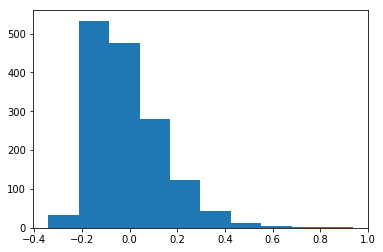

In [71]:
plt.hist([x[1] for x in Xdot])

In [72]:
X_train,y_train1 = get_data_from_dict_filter(trainset,1)
X_train,y_train2 = get_data_from_dict_filter(trainset,2)
X_train,y_train3 = get_data_from_dict_filter(trainset,3)
X_train,y_train4 = get_data_from_dict_filter(trainset,4)
X_train,y_train5 = get_data_from_dict_filter(trainset,5)

In [ ]:
pred

In [73]:
y_train2 = np.array(y_train1)+np.array(y_train2)+np.array(y_train3)+np.array(y_train4)+np.array(y_train5)

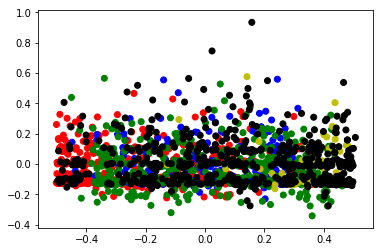

In [74]:
color_label = [colors[i] for i in y_train2]
plt.scatter([x[0] for x in Xdot],[x[1] for x in Xdot],color=color_label)
#plt.ylim(-0.2,0.5)

## Plot tree